# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
#Import numpy package
import numpy as np

#Import optimize from scipy package
from scipy import optimize

#Import pyplot and chossing style.
import matplotlib.pyplot as plt

#Autoload
%load_ext autoreload
%autoreload 2

# Question 1

We start defining the given variables, then defining the utility function, and the budget contraint. Finally, we come to the conclusion of the optimal level of comsumption, $c^*$ and the optimal level of labour supply, $l^*$ and the optimal utility. 

In [3]:
#Defining variables given
m = 1
v = 10
e = 0.3
tau0 = 0.4
tau1 = 0.1
k = 0.4
w = 1 #set as exogenous

#Defining the given function
def utility(c, l, v, e):
    u = np.log(c) - v*(l**(1 + (1/e))/(1 + (1/e)))
    return u

#Defining s.t. (constraint)
def st(l, m, w, tau0, tau1, k):
    x = m + w*l - (tau0*w*l + tau1*np.fmax(w*l - k,0))
    return x

#We apply that c*=x
def cstar(l, m, w, tau0, tau1, k, v, e):
    c = st(l = l, m = m, w = w, tau0 = tau0, tau1 = tau1, k = k)
    return -utility(c = c, l = l, v = v, e = e)

#Finding l*, c* and utility that are optimal
def opt(m, w, tau0, tau1, k, v, e):
    sol = optimize.minimize_scalar (
        cstar, 
        method = 'bounded', 
        bounds = (0, 1), 
        args = (m, w,tau0, tau1, k, v, e) )
    l_opt = sol.x
    c_opt = st(l = l_opt, m = m, w = w, tau0 = tau0, tau1 = tau1, k = k)
    u_opt = utility(c = c_opt, l = l_opt, v = v, e = e)
    return l_opt, c_opt, u_opt

l_opt, c_opt, u_opt = opt(m, w, tau0, tau1, k, v, e)

#Printing optimal values
print(f'The optimal labor supply when w=1 is {l_opt:.3f}')
print(f'The optimal consumption when w=1 is {c_opt:.3f}')
print(f'The optimal utility when w=1 is {u_opt:.3f}')


The optimal labor supply when w=1 is 0.400
The optimal consumption when w=1 is 1.240
The optimal utility when w=1 is 0.172


# Question 2

We want to plot the function of l and c given the wage. 

<function matplotlib.pyplot.show(*args, **kw)>

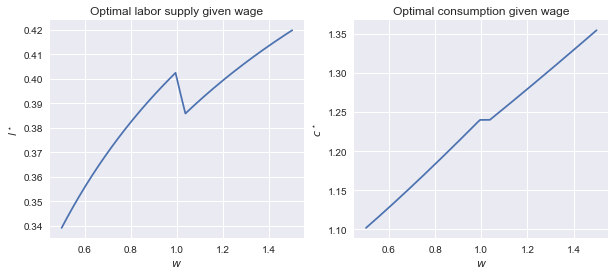

In [4]:
np.random.seed(13)
N = 10000
w_values = np.linspace(0.5,1.5,N)
l_values = np.empty(N)
c_values = np.empty(N)

for i,w in enumerate(w_values):
    sol2=opt(m, w,tau0, tau1, k, v, e)
    l_values[i] = sol2[0]
    c_values[i] = sol2[1]

plt.style.use('seaborn')
fig = plt.figure(figsize = (10,4))

#Labor
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_values,l_values)
#Names
ax_left.set_title('Optimal labor supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

#Consumption
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_values, c_values)
#Names
ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

#Plot
plt.show

# Question 3

We want to calculate the total tax revenue, given $\epsilon = 0.3$

In [5]:
def taxrev(w_values,l_values,tau0,tau1,k):
    rev = np.sum(tau0*w_values*l_values + tau1*np.fmax(w_values*l_values - k,0))
    return rev

print(f'The total tax revenue when e=0.3 is {taxrev(w_values,l_values,tau0,tau1,k):.3f}')

The total tax revenue when e=0.3 is 1630.187


# Question 4

We want to calculate the total tax revenue, given $\epsilon = 0.1$

In [6]:
#We do the same as in Question 2 and Question 3, where e=0.1 now
e_new = 0.1

for i,w in enumerate(w_values):
    sol3 = opt(m, w,tau0, tau1, k, v, e_new)
    l_values[i] = sol3[0]
    c_values[i] = sol3[1]
     
print(f'The total tax revenue when e=0.1 is {taxrev(w_values,l_values,tau0,tau1,k):.3f}')

The total tax revenue when e=0.1 is 3196.881


# Question 5

We want to find $\tau_0$, $\tau_1$ $\kappa$, such that the politician maximizes, the total tax revenue.    

In [7]:
#Defining object to optimize where e=0.3
def optimal(x, l = l_values, w = w_values, m = 1, v = 10, e = 0.3):
    tau0 = x[0]
    tau1 = x[1]
    k = x[2]
    return -taxrev(w_values, l_values, tau0, tau1, k)

#Defining bounds for tau0, tau1 and k
bounds = ((0,1),(0,1),(0,1.5))

#Finding and reporting optimal t0, t1 and k
initial_guess = [0.4, 0.1, 0.4]
sol4 = optimize.minimize(
    optimal,
    initial_guess,
    args=(w_values, l_values, tau0, tau1, k),
    method="SLSQP",
    bounds=bounds)

tau0 = sol4.x[0]
tau1 = sol4.x[1]
k = sol4.x[2]
tot= taxrev(w_values, l_values, tau0=tau0, tau1=tau1, k=k)

print(f'It is optimal for a politician to set the values such that tau0 is {tau0:.0f}, tau1 is {tau1:.0f} and k is {k:.0f} which yields a total tax revenue of {tot:.0f}')

It is optimal for a politician to set the values such that tau0 is 1, tau1 is 1 and k is 0 which yields a total tax revenue of 14380


# Conclusion

By solving the given utility function we have found the optimal values for labour, consumption, and utility. Moreover we have found $\epsilon$ effect on the tax revenue, if, $\epsilon$ goes toward 0 the tax revenue increases. Futhermore, we have found the optimal values for the policymakers point of view.  